# Water Potability

### Data Analysis and Machine Learning Modeling for Water Potability

In this study, we conducted an analysis of a dataset containing various features related to water quality to determine the potability of the water.


- **pH value:** A parameter that evaluates the acid-base balance of water, indicating its acidic or alkaline condition. WHO recommends a pH range of 6.5 to 8.5 for water.

- **Hardness:** Caused by dissolved calcium and magnesium salts in water, which come from geological deposits. The longer water is in contact with these materials, the higher the hardness.

- **Solids (Total dissolved solids - TDS):** Water can dissolve various inorganic and organic minerals or salts, affecting its taste and appearance. High TDS values indicate high mineralization. The desirable limit for TDS in drinking water is 500 mg/L, with a maximum limit of 1000 mg/L.

- **Chloramines:** Disinfectants used in public water systems, formed by adding ammonia to chlorine for water treatment. Safe chlorine levels for drinking water are up to 4 mg/L.

- **Sulfate:** Naturally occurring substances found in minerals, soil, rocks, and various sources. Sulfate concentrations vary but generally range from 3 to 30 mg/L in freshwater. Seawater has a sulfate concentration of about 2700 mg/L.

- **Conductivity:** Pure water is a poor conductor of electricity, but increased ion concentration enhances its electrical conductivity. The WHO standard sets a maximum electrical conductivity (EC) value of 400 μS/cm.

- **Organic_carbon:** Total Organic Carbon (TOC) measures the amount of carbon in organic compounds in water. The US EPA sets a limit of < 2 mg/L in treated/drinking water and < 4 mg/L in source water for treatment.

- **Trihalomethanes:** Chemicals that can be found in water treated with chlorine. The concentration of THMs in drinking water depends on various factors. Up to 80 ppm is considered safe.

- **Turbidity:** Measures the quantity of solid matter suspended in water, affecting its light-emitting properties. Turbidity is used to indicate the quality of waste discharge. The mean turbidity value obtained for Wondo Genet Campus is lower than the WHO recommended value of 5.00 NTU.

- **Potability:** Indicates whether water is safe for human consumption, with a value of 1 meaning potable and 0 meaning not potable.

After analyzing the dataset, we utilized machine learning techniques to develop a predictive model for water potability based on the provided features. The model aims to determine the safety of water for human consumption. By training the model on a subset of the dataset and evaluating its performance, we can assess its accuracyand predictive capabilities.
The analysis involved visualizing the relationships between different features using various graphs and charts. For example, scatter plots were used to examine the correlation between pH value and potability, hardness and potability, and other relevant combinations. Line plots were utilized to observe trends in conductivity and turbidity over time.
Furthermore, statistical analyses were conducted to gain insights into the distribution of each feature and their impact on water potability.
To build the machine learning model, we employed various classification algorithms. The dataset was divided into training and testing sets to evaluate the model's performance accurately. The model was trained on the training set, and its predictive ability was assessed using the testing set.
Evaluation metrics such as accuracy, precision, recall, and F1-score were used to measure the model's performance. Cross-validation techniques such as k-fold cross-validation were applied to ensure the model's generalizability and robustness.

By combining the data analysis with the machine learning model, we aimed to provide a comprehensive understanding of the water quality and its potability based on the given dataset. The results obtained from this analysis can be valuable for water management authorities, policymakers, and researchers in making informed decisions regarding water treatment and ensuring the safety of drinking water for the population.

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import seaborn as sns
import plotly.express as px
from collections import Counter
import matplotlib.colors as mcolors

colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
colors_red = ['#FF0000', '#FF3333', '#FF6666', '#FF9999', '#FFCCCC']
colors_orange = ['#FF6600', '#FF8000', '#FF9900', '#FFB200', '#FFCC00']

# Set default settings
plt.rcParams['figure.figsize'] = (10.0, 8) # set default size of plots
pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [2]:
# Reading the dataset
df = pd.read_csv("water_potability.csv", sep=',')
df.columns = [col.lower() for col in df]
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
# How much memory the dataset takes?
# Are there some missing values?

df.info(memory_usage='deep') # memory_usage parameter allows us to see the real memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Descriptive statistics
df.describe()

ph     hardness        solids  chloramines      sulfate   
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000  \
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       conductivity  organic_carbon  trihalomethanes    turbidity   potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Exploratory data analysis

First of all, we'll check the class balance!

In [5]:
d= pd.DataFrame(df['potability'].value_counts())
fig = px.pie(d,values='count',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_orange[0],colors_blue[1]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

We have unbalanced class, so we have to upsample the potable (1) class.

As you can see, there isn't any tangible correlation between the dataset's features and the target (potability). So we have to search deeply to find the right way! 

<AxesSubplot: >

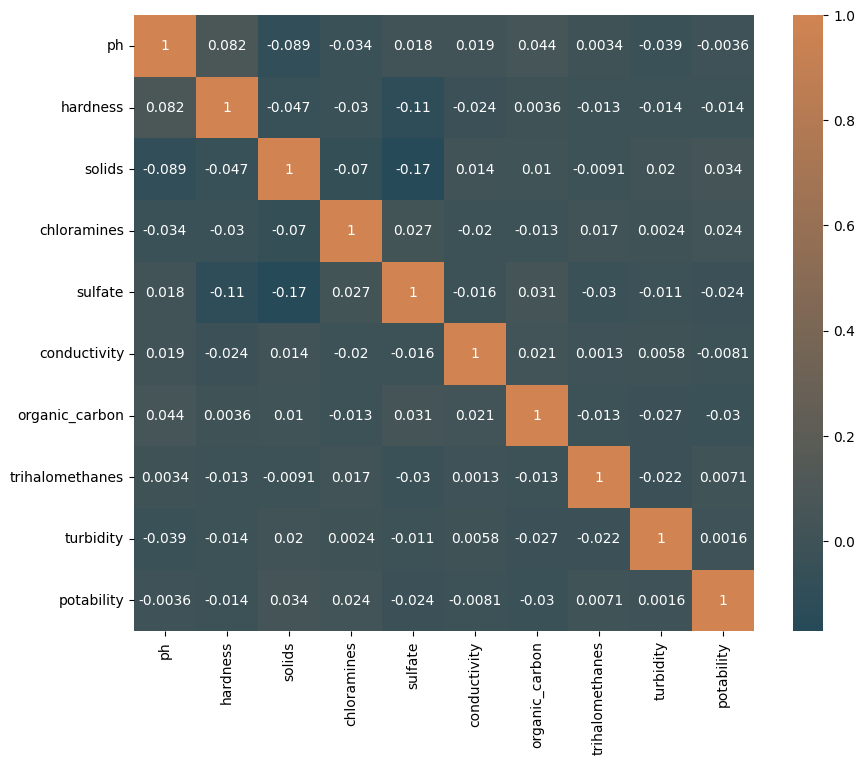

In [11]:
# Generating a colormap with adjusted saturation
custom_cmap = sns.diverging_palette(220, 20, s=50, l=50, sep=2, as_cmap=True)

# Adding the custom colors to the colormap
custom_cmap = custom_cmap.from_list('custom_colormap', ["#264A58", '#d18452'])


# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=custom_cmap)

With the pairplot, we can investigate the relationships and correlations between multiple variables in a dataset. It provides a visual representation of scatter plots for each combination of variables, allowing us to examine how they interact and potentially identify patterns or trends. This can be particularly useful in exploratory data analysis and understanding the underlying relationships within the data.

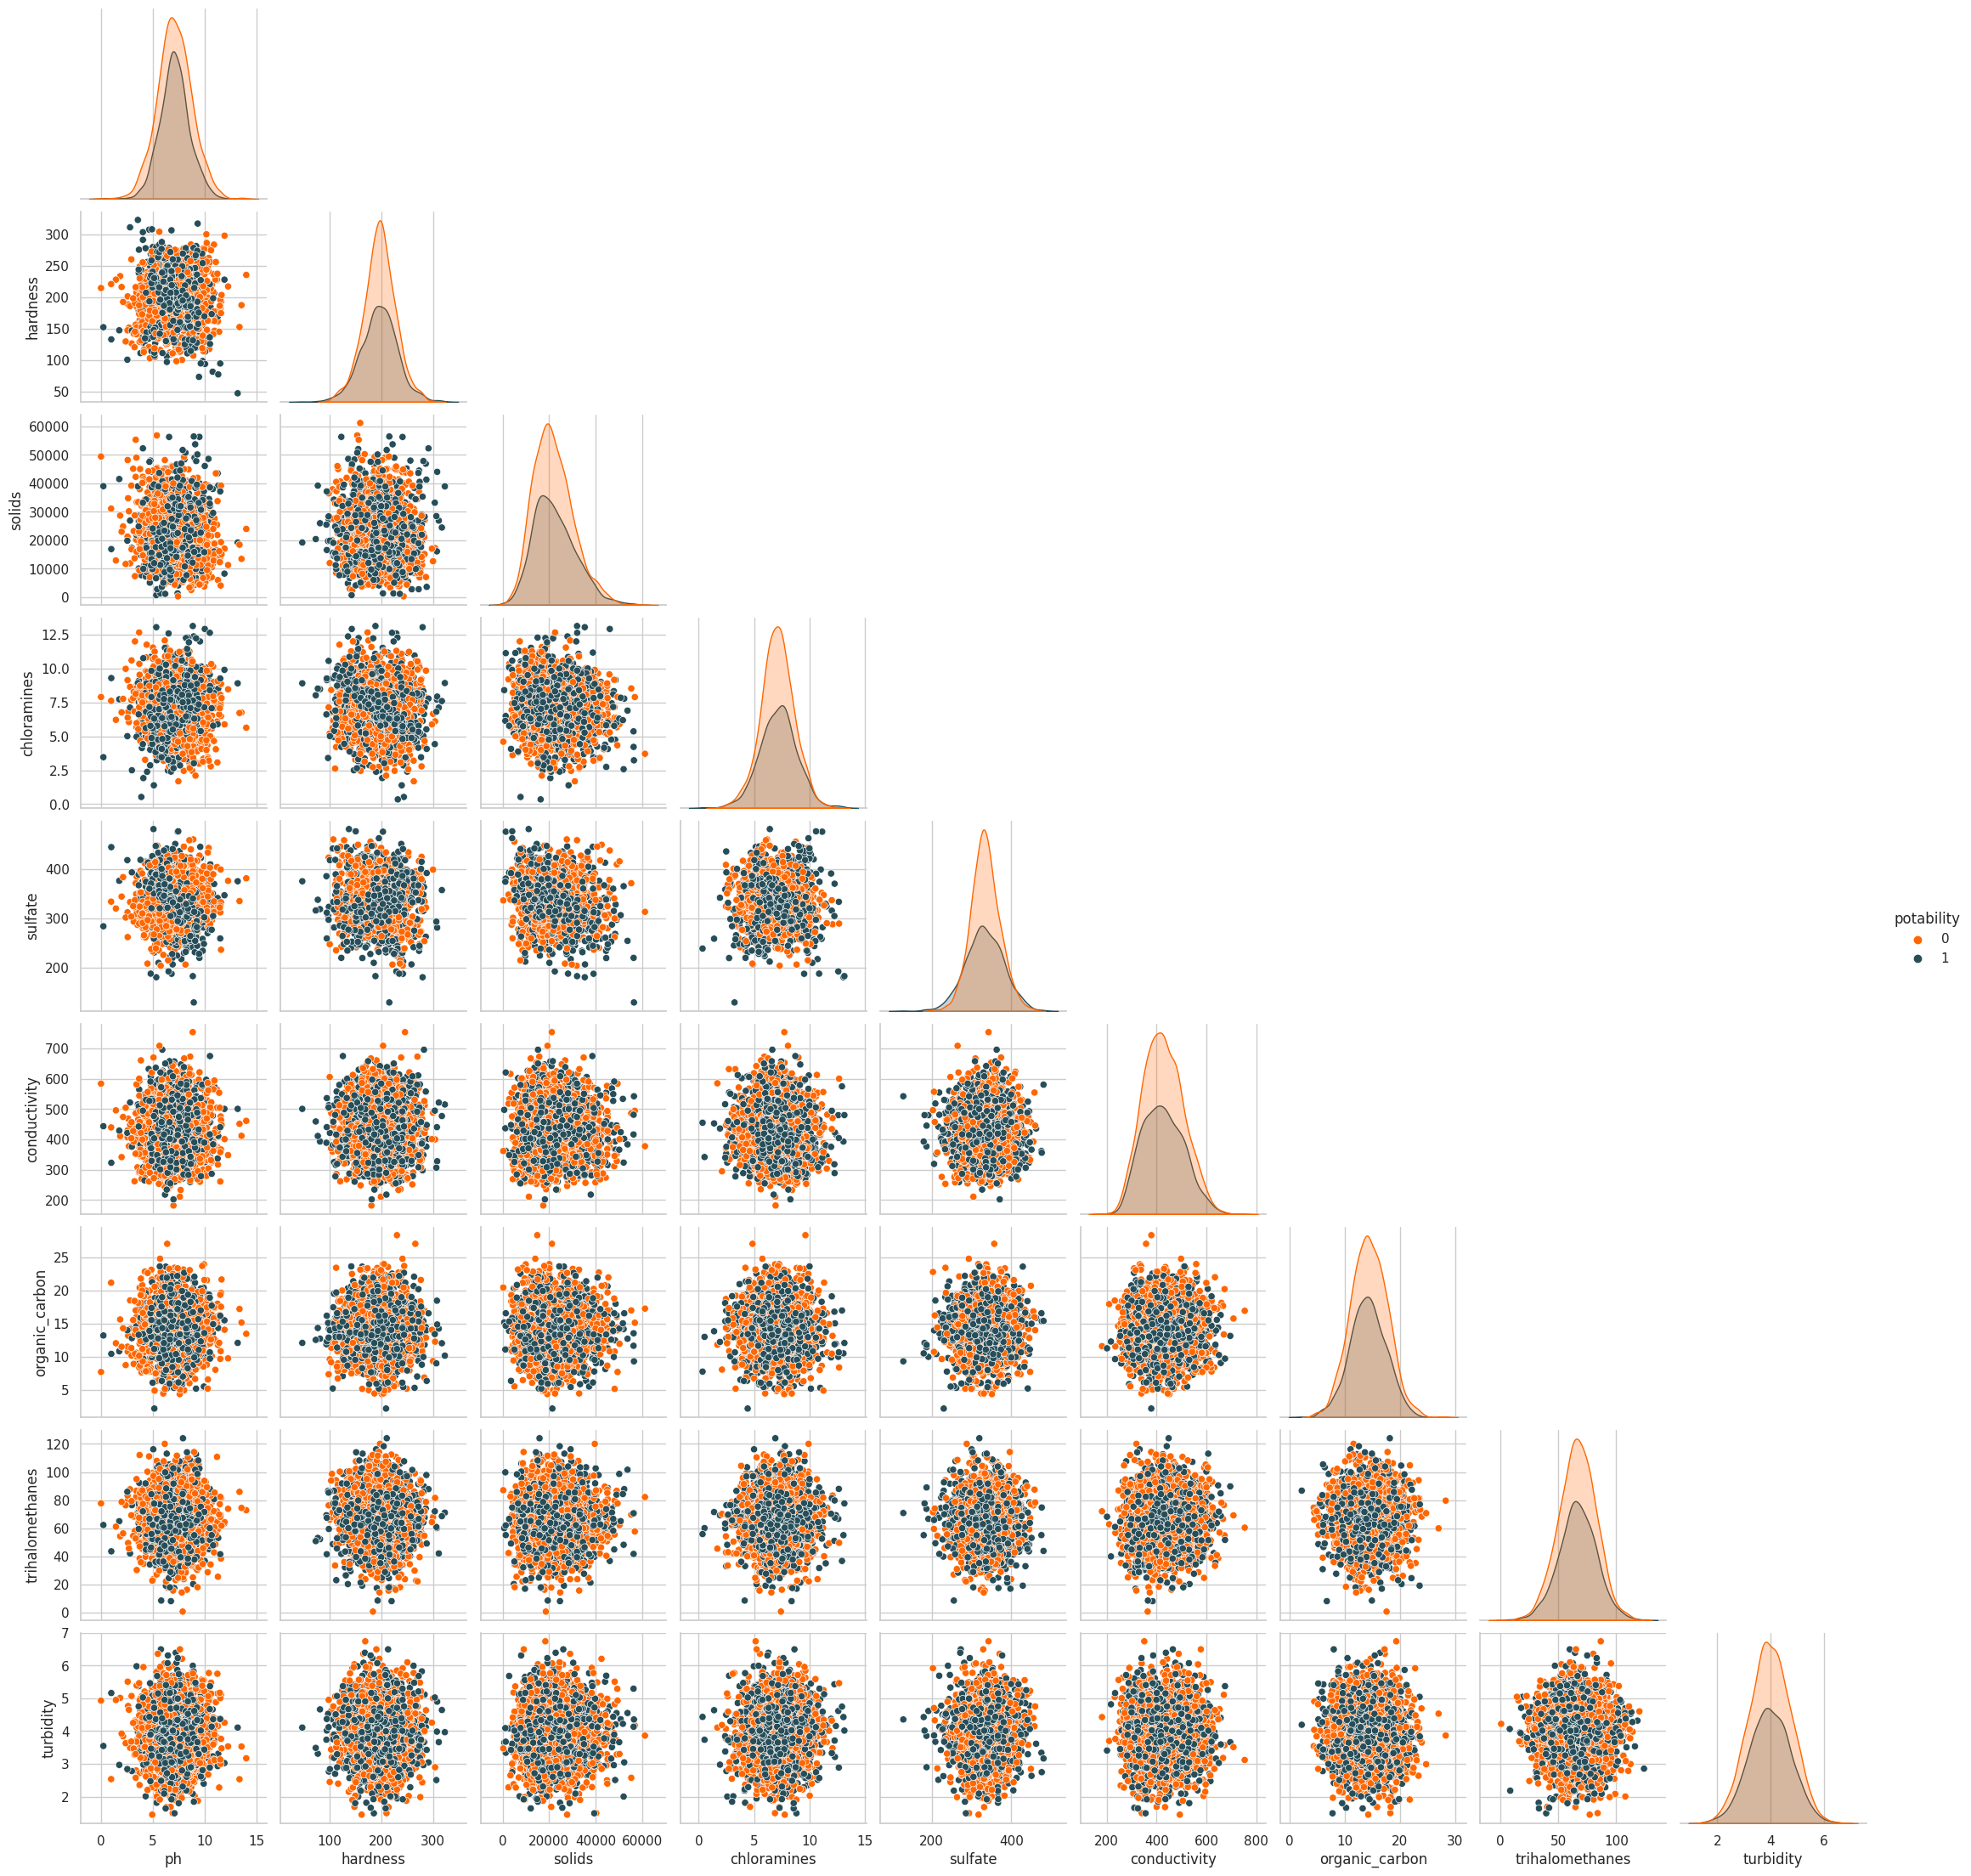

In [37]:
sns.pairplot(df, corner=True, hue='potability', palette=[colors_orange[0], colors_blue[1]])

As you can see there is a high degree of variability or noise present in the dataset. This can be observed in the pairplot, where the scatter plots show scattered and dispersed data points, indicating a lack of strong relationships or patterns among the variables. The high level of noise suggests that there may be various factors or influences affecting the data, making it challenging to identify clear trends or make accurate predictions based solely on the visualized relationships. In such cases, additional data preprocessing techniques or more advanced machine learning algorithms may be necessary to extract meaningful insights from the dataset.

The pH plots indeed appear to exhibit a relatively regular pattern compared to the other plots in the dataset. The data points for pH values appear to cluster closely together, indicating a consistent and predictable range of acidity or alkalinity levels. This regularity suggests that the pH values of the water samples in the dataset are relatively stable and fall within a specific range. The regularity in the pH plots may imply that this feature has less variability or noise compared to other features in the dataset. However, it is important to conduct a thorough analysis and consider other statistical measures to fully understand the nature and distribution of the pH data. 

Let's investigate the pH data distributions!

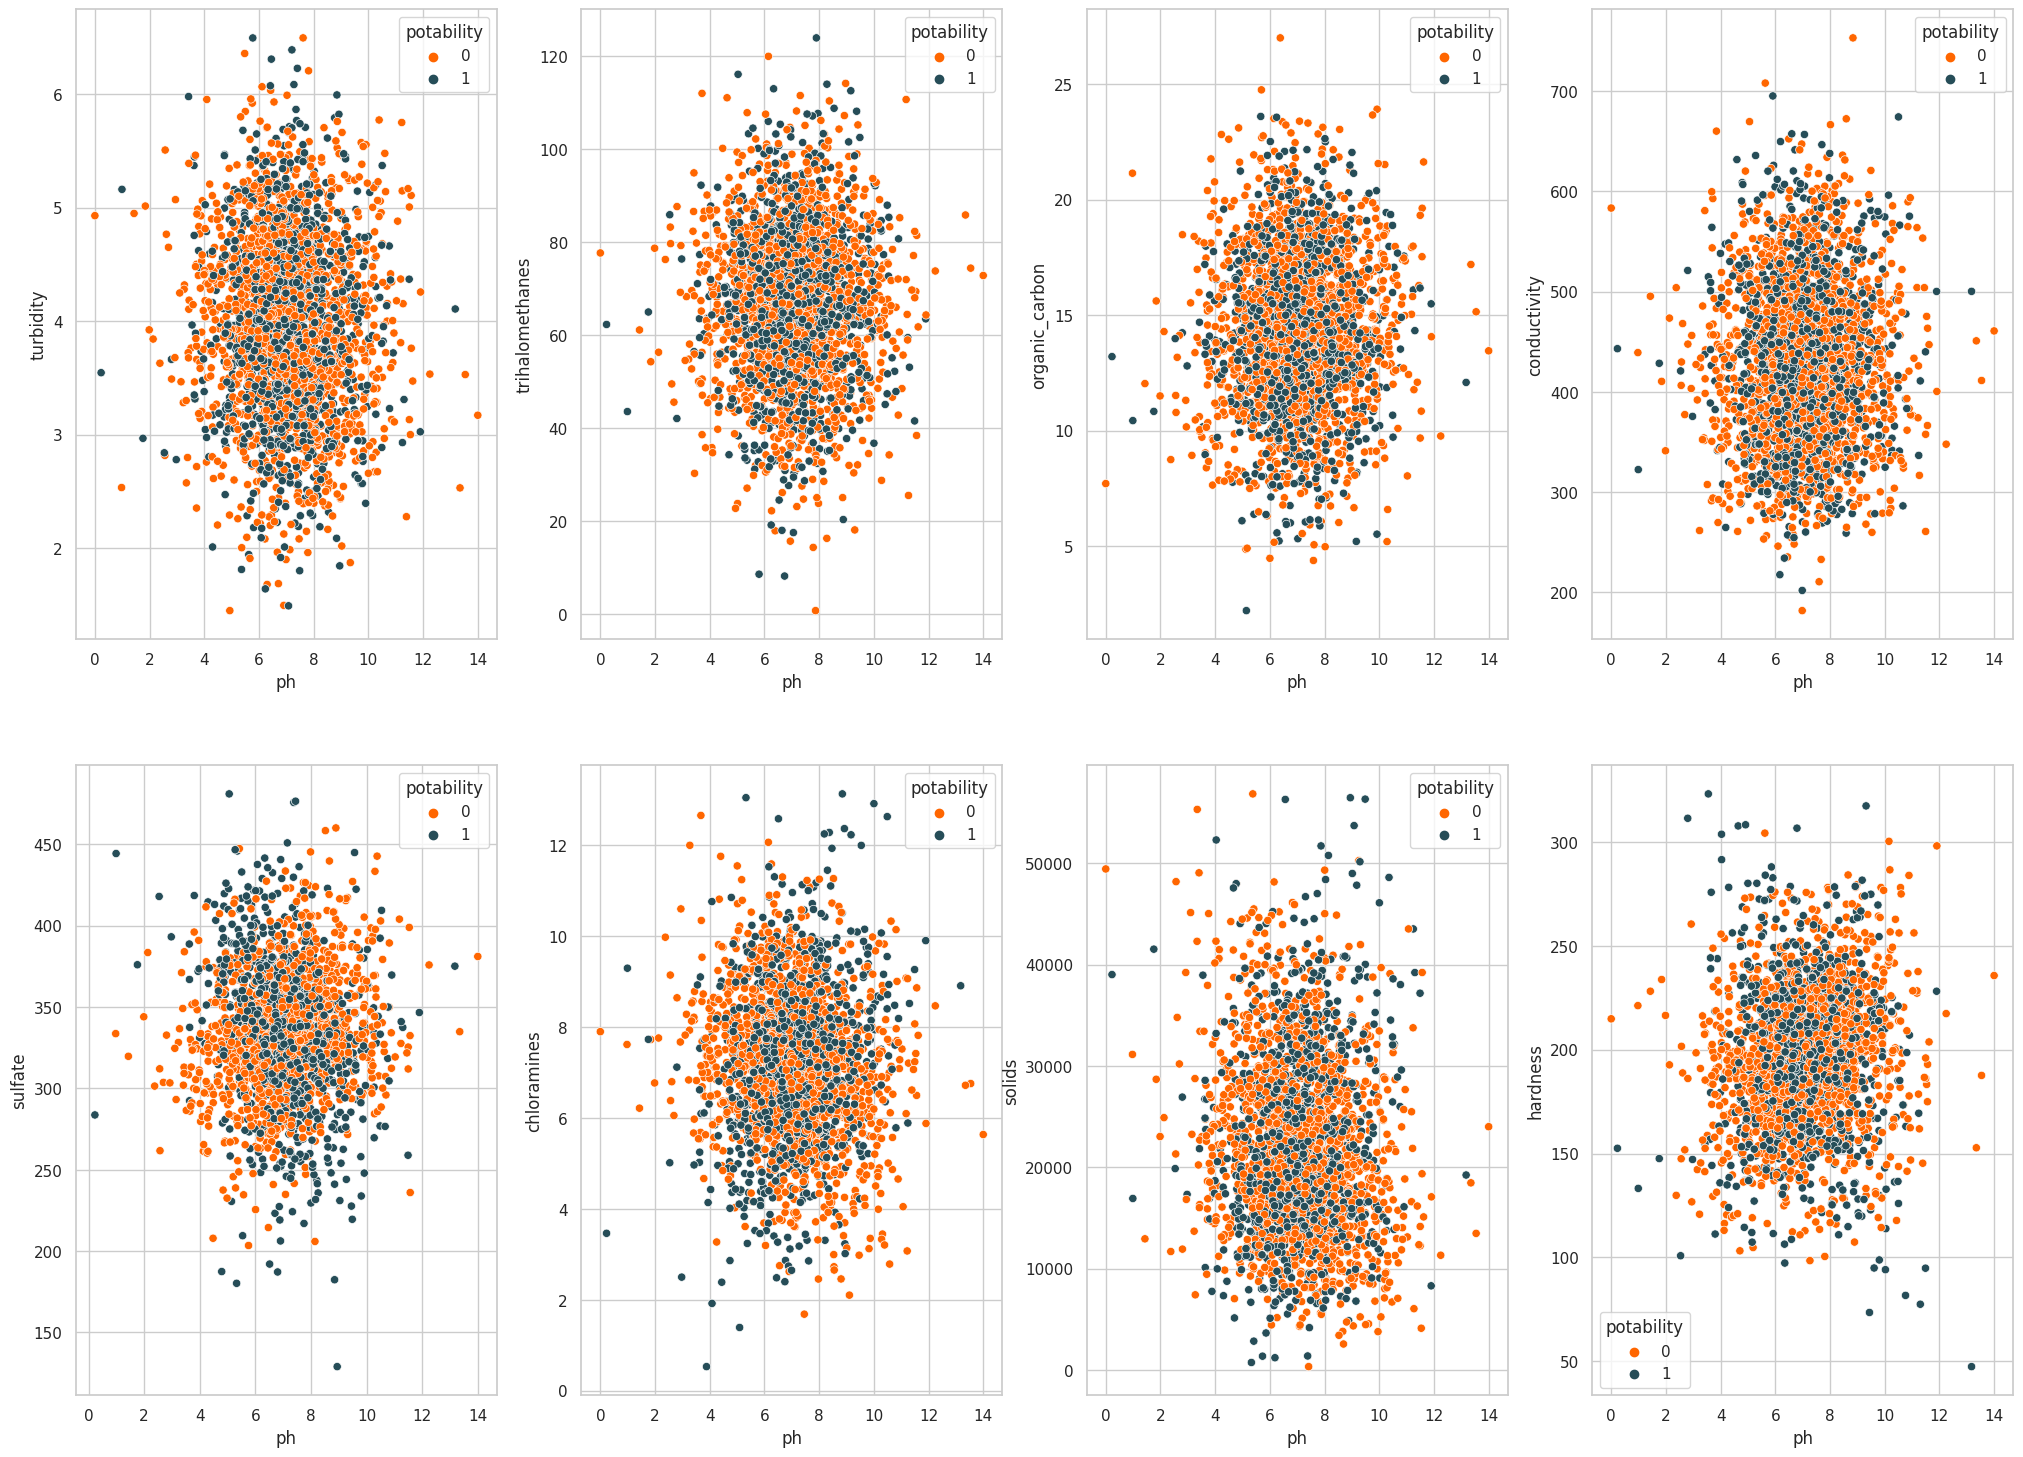

In [36]:
plt.rcParams['figure.figsize'] = (25.0, 18)

fig, axs = plt.subplots(ncols=4, nrows=2, sharey=False)
sns.scatterplot(x='ph', y='turbidity',       data=df, ax=axs[0][0], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='trihalomethanes', data=df, ax=axs[0][1], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='organic_carbon',  data=df, ax=axs[0][2], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='conductivity',    data=df, ax=axs[0][3], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='sulfate',         data=df, ax=axs[1][0], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='chloramines',     data=df, ax=axs[1][1], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='solids',          data=df, ax=axs[1][2], hue='potability', palette=[colors_orange[0], colors_blue[1]])
sns.scatterplot(x='ph', y='hardness',        data=df, ax=axs[1][3], hue='potability', palette=[colors_orange[0], colors_blue[1]])


plt.show()

Once again, we are dealing with very uninformative plots, which suggests that we will definitely need robust and probabilistic models.

Let's now inspect the features!

In [29]:
fig = px.histogram(df,x='ph',y=Counter(df['ph']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_orange[0],colors_blue[1]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [32]:
fig = px.histogram(df,x='sulfate',y=Counter(df['sulfate']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_orange[0],colors_blue[1]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [35]:
fig = px.histogram(df,x='chloramines',y=Counter(df['chloramines']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_orange[0],colors_blue[1]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In confirmation of the above, these boxplots also indicate that there is no significant difference in distributions between the measurements of potable water and non-potable water for the target feature (potability).

## Feature pre-processing

In this section, we will focus on the data pre-processing phase, as we prepare our data to ensure optimal performance of our learning models.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("water_potability.csv", sep=',')
df.columns = [col.lower() for col in df]

features = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']
target = 'potability'
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Deal with null values...

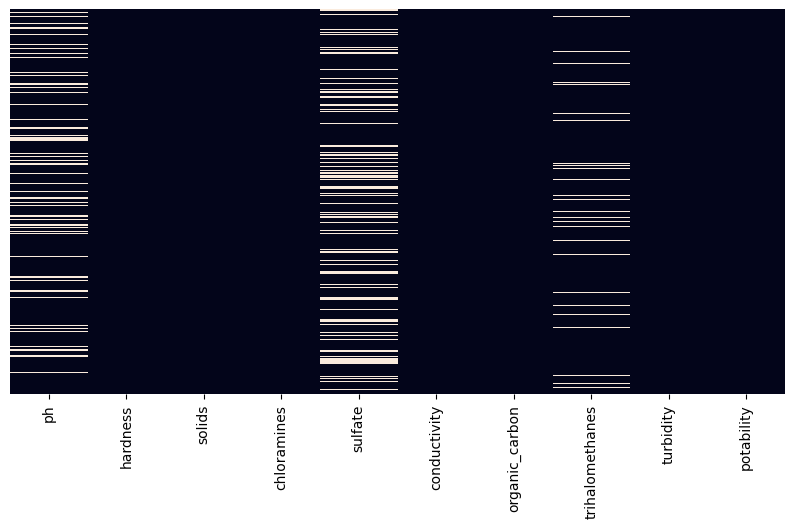

In [16]:
plt.rcParams['figure.figsize'] = (10.0, 5)

# Creazione del grafico dei valori mancanti utilizzando Seaborn
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.show()

We can observe that there are columns pH, sulfate, and trihalomethanes that have many null values. 
This situation can be handled in two ways: 
- By removing those rows.
- By filling the null values in those rows with the column's mean value based on the potability.

I've chose the second one because of the is a huge ammount (1/3) of null values. If we drop all rows that contain null values we'll lose a lot of data.

In [5]:
def fillNall(df_t, features):
    
    for feature in features:
        
        condition = df['potability'] == 0

        map = {

            True: df.loc[df['potability']==0][feature].median(),
            False:df.loc[df['potability']==1][feature].median()
        }

        df_t[feature].fillna(condition.map(map), inplace=True)
        
    return df_t

In [6]:
preprocessing_pipeline = Pipeline([
    ('fill_nan', FunctionTransformer(fillNall, kw_args={'features': ['ph', 'sulfate', 'trihalomethanes']})),
    ('PolynomialFeatures', PolynomialFeatures(degree=2, include_bias=True)),
    ('scaler', StandardScaler()),
])

X = preprocessing_pipeline.fit_transform(df.drop(['potability'], axis=1))

y = df['potability'].to_numpy()

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

# Balance the dataset's class 
X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

# Double the size of the train dataset for more accurate models
X_train = np.concatenate((X_train, X_train), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

## Models

In [8]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, precision_score, accuracy_score

### Baseline models

Base-baseline model

In [26]:
baseline_accuracy = df[df['potability'] == 0]['potability'].count() / df['potability'].count()
print("Baseline model accuracy:", baseline_accuracy)

Baseline model accuracy: 0.6098901098901099


Cross validation

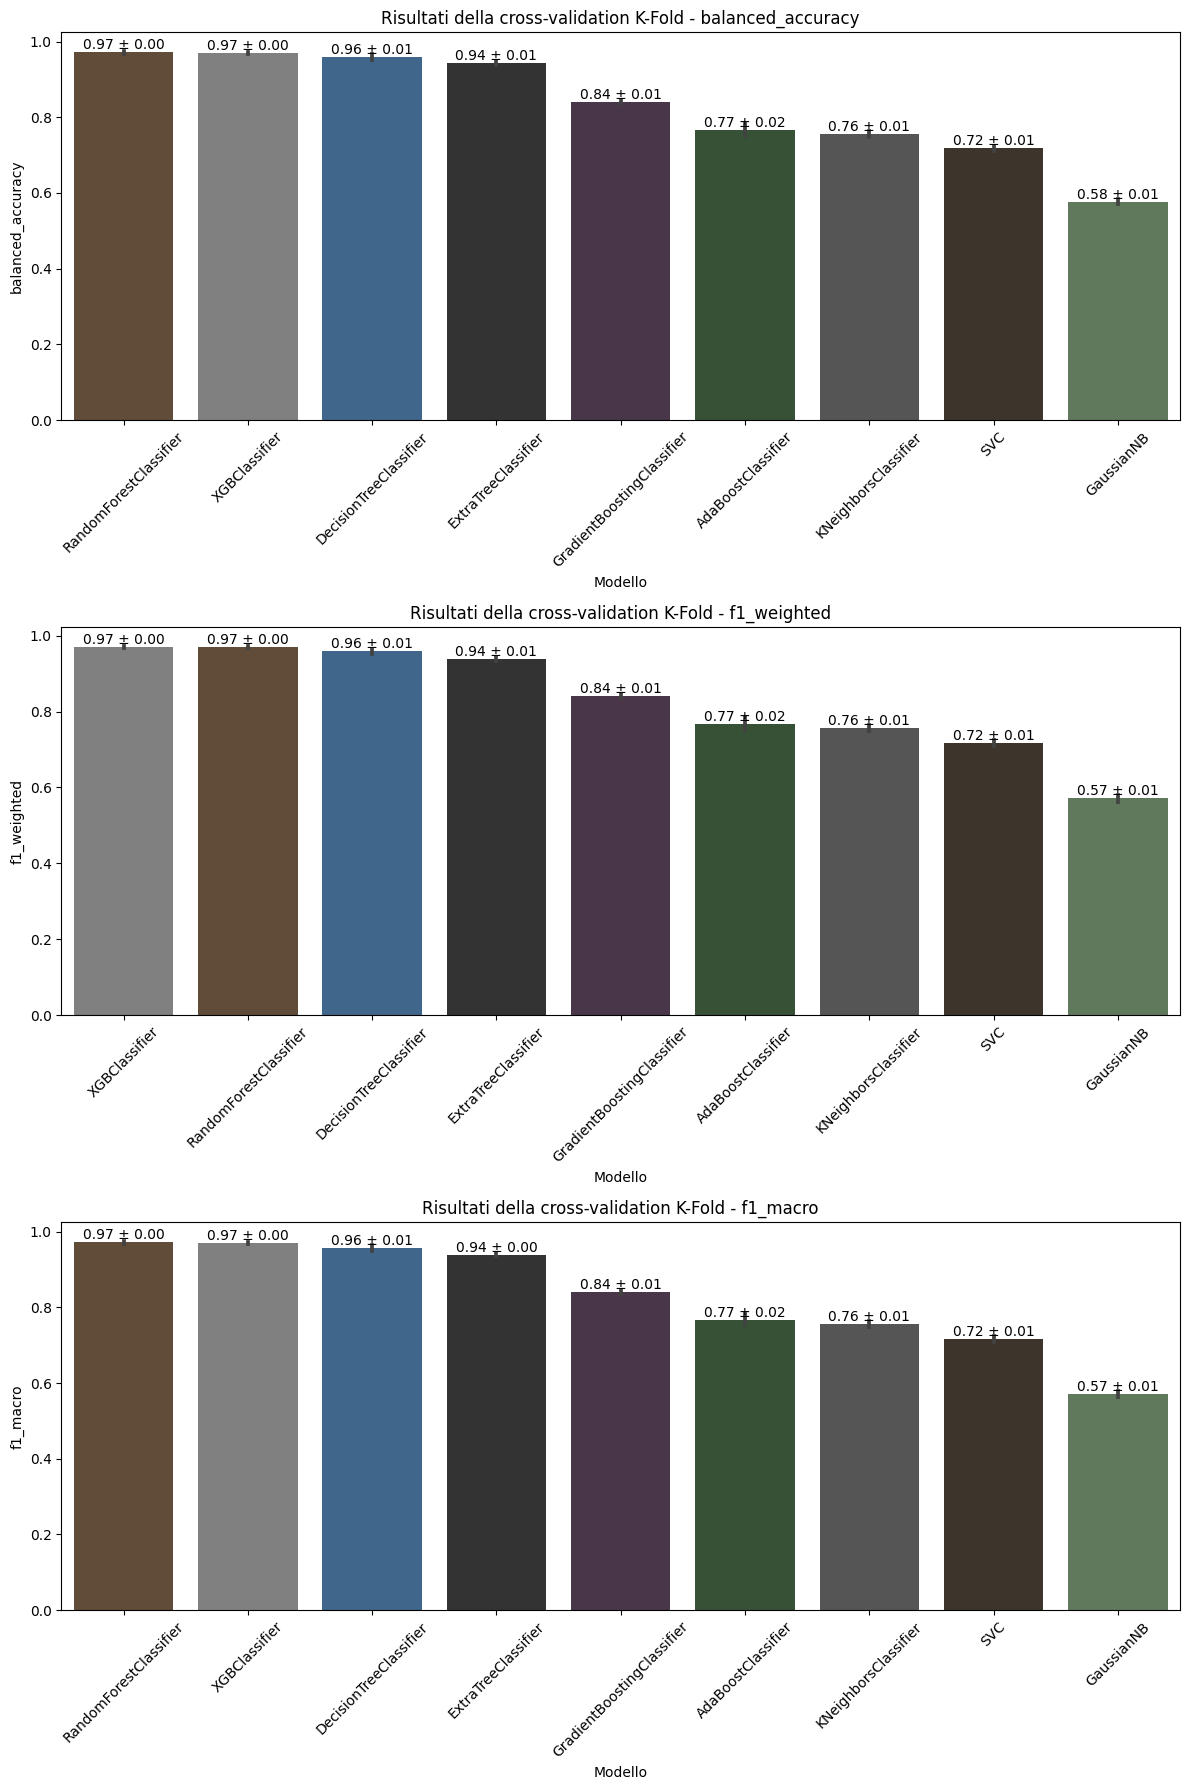

In [124]:
# Definizione dei modelli
models = [
    #LogisticRegression(max_iter=2000),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    ExtraTreeClassifier(),
    #MLPClassifier(alpha=1, max_iter=1000)
]

# Creazione del KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


# Definizione delle metriche da considerare
metrics = ["balanced_accuracy", "f1_weighted", "f1_macro"]

# Lista per salvare i risultati delle diverse metriche
results = {metric: [] for metric in metrics}

# Esecuzione della cross-validation per le diverse metriche
for model in models:
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring=metric)
        results[metric].append(scores)

# Creazione del plot con Seaborn per le diverse metriche
plt.rcParams['figure.figsize'] = (12, 18)
num_metrics = len(metrics)

model_colors = {
    'LogisticRegression': '#666666',
    'DecisionTreeClassifier': '#336699',
    'GaussianNB': '#5C7E58',
    'RandomForestClassifier': '#664C33',
    'XGBClassifier': '#808080',
    'AdaBoostClassifier': '#335533',
    'GradientBoostingClassifier': '#4C344C',
    'KNeighborsClassifier': '#555555',
    'SVC': '#403529',
    'ExtraTreeClassifier': '#333333',
    'MLPClassifier': '#444444'
}


for i, metric in enumerate(metrics):

    # Ordinamento dei modelli in base alla media delle metriche
    sorted_models = sorted(models, key=lambda model: np.mean(results[metric][models.index(model)]), reverse=True)

    ax = plt.subplot(num_metrics, 1, i + 1)
    metric_results = [results[metric][models.index(model)] for model in sorted_models]

    # Trasformazione dei nomi dei colori in RGBA
    model_colors_rgba = [model_colors[type(model).__name__] for model in sorted_models]

    sns.barplot(data=metric_results, palette=model_colors_rgba)
    plt.xticks(range(len(models)), [type(model).__name__ for model in sorted_models], rotation=45)
    plt.xlabel('Modello')
    plt.ylabel(metric)
    plt.title(f'Risultati della cross-validation K-Fold - {metric}')

    # Aggiunta delle percentuali sulle barre
    for j in range(len(models)):
        scores = metric_results[j]
        mean_score = scores.mean()
        std_score = scores.std()
        text = f'{mean_score:.2f} ± {std_score:.2f}'
        ax.text(j, mean_score, text, ha='center', va='bottom')

plt.tight_layout()
plt.show()

The three models with highest score are:

- Random Forest
- XGB Classifier
- Decision Tree

## Hyperparameter tuning of all 3 models

Grid-search function

In [153]:
def gridsearch(X_train, y_train, parameters, kfold, metric, model):

    kfold = KFold(n_splits=kfold, shuffle=True, random_state=0)

    grid_search = GridSearchCV(model, parameters, cv=kfold, n_jobs=-1, scoring=metric)
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri e lo score ottenuto
    print("########## ", metric.upper(), " ##########")
    print("Migliori parametri trovati:")
    print(grid_search.best_params_)
    print("Miglior score ottenuto:")
    print(grid_search.best_score_)
    
    return grid_search

Random Forest

In [154]:
# Definisci i parametri da esplorare nella grid search
parameters = {
    'n_estimators': [200, 300, 500, 800, 1000],
    'max_depth': [50],# ->
    'min_samples_split': [2, 3, 4],# ->
    'min_samples_leaf': [1],# 2, 4, 10],
    'max_features': ['sqrt'],
    'random_state': [0],
}

metric = 'accuracy'

# Creazione del GridSearch
grid_search = gridsearch(X_train, y_train, parameters, kfold=8, metric=metric, model=RandomForestClassifier())

##########  ACCURACY  ##########
Migliori parametri trovati:
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200, 'random_state': 0}
Miglior score ottenuto:
0.9843846427576047


In [20]:
# Model fitting

rnd = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_split=4,
                             min_samples_leaf=1, max_features='sqrt', random_state=0, n_jobs=-1)
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy score: 0.823170731707317
F1 score: 0.816919191919192
Recall: 0.6422764227642277
Precision: 0.8494623655913979
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       205
           1       0.85      0.64      0.73       123

    accuracy                           0.82       328
   macro avg       0.83      0.79      0.80       328
weighted avg       0.83      0.82      0.82       328



XGBoost

In [188]:
# Definisci i parametri da esplorare nella grid search
#setting grid of selected parameters for iteration
parameters = {
                'gamma': [0], # ok
                'learning_rate': np.arange(0.1, 0.8, 0.01), # Ok
                'max_depth': [50], # ok
                'n_estimators': [200], # Ok
                'reg_alpha': [1],#ok
                'reg_lambda': [5],# ok
                'booster': ['gbtree'] # ok
}

metric = 'accuracy'

# Creazione del GridSearch
grid_search = gridsearch(X_train, y_train, parameters, 2, metric, XGBClassifier())

# Stampa i migliori parametri e lo score ottenuto
print("########## ", metric.upper(), " ##########")
print("Migliori parametri trovati:")
print(grid_search.best_params_)
print("Miglior score ottenuto:")
print(grid_search.best_score_)

##########  ACCURACY  ##########
Migliori parametri trovati:
{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.19999999999999996, 'max_depth': 50, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 5}
Miglior score ottenuto:
0.9311210262130507


In [17]:
# Model fitting
xgb = XGBClassifier(n_estimators=200, max_depth=50, learning_rate=0.2, gamma=0, reg_alpha=1, reg_lambda=5, booster='gbtree')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8201219512195121
F1 score: 0.8165773286918662
Recall: 0.6829268292682927
Precision: 0.8076923076923077
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       205
           1       0.81      0.68      0.74       123

    accuracy                           0.82       328
   macro avg       0.82      0.79      0.80       328
weighted avg       0.82      0.82      0.82       328



In [106]:
pk.dump(rnd, open('rnd-700es.pkl', 'wb'))

In [101]:
xgb = pk.load(open('xgb-700es-lr0.05.pkl', 'rb'))

Voting Classifier

In [19]:
from sklearn.ensemble import VotingClassifier
ens_soft_voting = VotingClassifier(
    estimators=[

        ('XGBoost',      XGBClassifier(n_estimators=200, max_depth=50, learning_rate=0.2, gamma=0, reg_alpha=1, reg_lambda=5, booster='gbtree')),
        ('RandomForest', RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=4,
                             min_samples_leaf=1, max_features='sqrt', random_state=0, n_jobs=-1)),
],
    voting='hard',
    n_jobs=8
)
ens_soft_voting.fit(X_train, y_train)

y_pred = ens_soft_voting.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8353658536585366
F1 score: 0.8273094093406592
Recall: 0.6260162601626016
Precision: 0.9058823529411765
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       205
           1       0.91      0.63      0.74       123

    accuracy                           0.84       328
   macro avg       0.86      0.79      0.81       328
weighted avg       0.85      0.84      0.83       328



In [25]:

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,28))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
